In [1]:
pip install pandas==1.5.3 numpy==1.23.5 neuron==8.2.2 netpyne==1.0.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, bu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Define the directory where the .hoc file and likely the .mod files are located
mod_dir = '/content/drive/MyDrive/Brain Modeling FS RS Neurons/Cell Morphologies/'

os.chdir(mod_dir)

In [3]:
ls

converted_neuron.swc  I03481.asc  morphologies/        tut2_traces.png
emodels_hoc/          mod2/       tut2_plot_2Dnet.png  x86_64/


In [4]:
!nrnivmodl mod2
print("Compilation attempt finished.")

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content/drive/MyDrive/Brain Modeling FS RS Neurons/Cell Morphologies
Mod files: "mod2/mod2/ar_traub.mod" "mod2/mod2/cadad.mod" "mod2/mod2/CaDynamics_DC0.mod" "mod2/mod2/CaDynamics_E2.mod" "mod2/mod2/cadyn.mod" "mod2/mod2/cagk.mod" "mod2/mod2/Ca_HVA2.mod" "mod2/mod2/Ca_HVA.mod" "mod2/mod2/cal_mh.mod" "mod2/mod2/cal_mig.mod" "mod2/mod2/Ca_LVAst.mod" "mod2/mod2/Ca.mod" "mod2/mod2/cancr.mod" "mod2/mod2/canin.mod" "mod2/mod2/can_mig.mod" "mod2/mod2/catcb.mod" "mod2/mod2/cat_mig.mod" "mod2/mod2/cat_traub.mod" "mod2/mod2/ch_CavL.mod" "mod2/mod2/ch_CavN.mod" "mod2/mod2/ch_KCaS.mod" "mod2/mod2/ch_Kdrfastngf.mod" "mod2/mod2/ch_KvAngf.mod" "mod2/mod2/ch_KvCaB.mod" "mod2/mod2/ch_leak.mod" "mod2/mod2/ch_Navngf.mod" "mod2/mod2/DetAMPANMDA.mod" "mod2/mod2/DetGABAAB.mod" "mod2/mod2/gabab.mod" "mod2/mod2/h_BS.mod" "m

In [5]:
from netpyne import specs, sim
import matplotlib.pyplot as plt

netParams = specs.NetParams()
%matplotlib inline

In [6]:
cellRule = netParams.importCellParams(label='RS', somaAtOrigin=True,
            conds={'cellType': 'RS', 'cellModel': 'HH_full'},
            fileName= 'emodels_hoc/cADpyr_L4TPC.hoc',
            cellName= 'cADpyr_L4TPC',
            cellInstance = False,
            cellArgs=[0, 'morphologies', 'I03481.asc'])

print("Cell import attempted.")

Cell import attempted.


In [7]:
netParams.cellParams['RS']['secs'].keys()

dict_keys(['soma_0', 'dend_0', 'dend_1', 'dend_2', 'dend_3', 'dend_4', 'dend_5', 'dend_6', 'dend_7', 'dend_8', 'dend_9', 'dend_10', 'dend_11', 'dend_12', 'dend_13', 'dend_14', 'dend_15', 'dend_16', 'dend_17', 'dend_18', 'dend_19', 'dend_20', 'dend_21', 'dend_22', 'dend_23', 'dend_24', 'dend_25', 'dend_26', 'dend_27', 'dend_28', 'dend_29', 'dend_30', 'dend_31', 'dend_32', 'dend_33', 'dend_34', 'dend_35', 'dend_36', 'dend_37', 'dend_38', 'axon_0', 'axon_1', 'myelin_0'])

In [8]:
## Population parameters
netParams.popParams['RS'] = {'cellType': 'RS', 'numCells': 10} #changed ratio RS:FS = 10:1 per Aric's sugggestion.
# netParams.popParams['FS'] = {'cellType': 'RS', 'numCells': 1} #changed ratio RS:FS = 10:1 per Aric's sugggestion.

# netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.5, 'tau2': 5.0, 'e': 0} #updated tau1 to 0.5 per Markram et al. (1998)
# netParams.synMechParams['inh'] = {'mod': 'Exp2Syn','tau1':0.1, 'tau2':2.0, 'e': -80}  #updated tau2 to 2 ms per Wang & Buzsáki (1996)

netParams.stimSourceParams['IClamp'] = {'type': 'IClamp', 'delay': 550, 'dur': 600, 'amp': 0.5}  # Intracellular current step
netParams.stimTargetParams['IClamp->RS'] = {'source': 'IClamp', 'conds': {'cellType': 'RS'}, 'sec':'soma_0', 'loc': 0.5}  # Apply to the first RS cell
# netParams.stimTargetParams['IClamp->FS'] = {'source': 'IClamp', 'conds': {'cellType': 'FS'}, 'sec':'soma_0', 'loc': 0.5}  # Apply to the first RS cell

In [9]:
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'tut2'         # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'saveFig': True, 'showFig': True}                  # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [0], 'saveFig': True, 'showFig' : True}  # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = {'saveFig': True, 'showFig' : True}                   # plot 2D cell positions and connections

In [10]:
sim.initialize(
    simConfig = simConfig,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations


Start time:  2025-07-14 14:47:51.332459


{RS: <netpyne.network.pop.Pop object at 0x7b048c7c2f50>}

In [11]:
sim.net.createCells()


Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 10 
  Done; cell creation time = 0.00 s.


[compartCell0,
 compartCell1,
 compartCell2,
 compartCell3,
 compartCell4,
 compartCell5,
 compartCell6,
 compartCell7,
 compartCell8,
 compartCell9]

In [12]:
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation

Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.


[[], [], [], [], [], [], [], [], [], []]

Recording 0 traces of 0 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 0.02 s; real-time ratio: 51.04.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 10
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.02 s
Preparing spike data...
No spikes available to plot raster
Plotting raster...

There was an exception in plotRaster()
Plotting recorded cell traces ... cell


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/netpyne/plotting/plotRaster.py", line 243, in plotRaster
    popNumCells = [max(spkInds)]
                       ^^^^^^^
UnboundLocalError: cannot access local variable 'spkInds' where it is not associated with a value


<Figure size 1000x800 with 0 Axes>

Plotting 2D representation of network cell locations and connections...


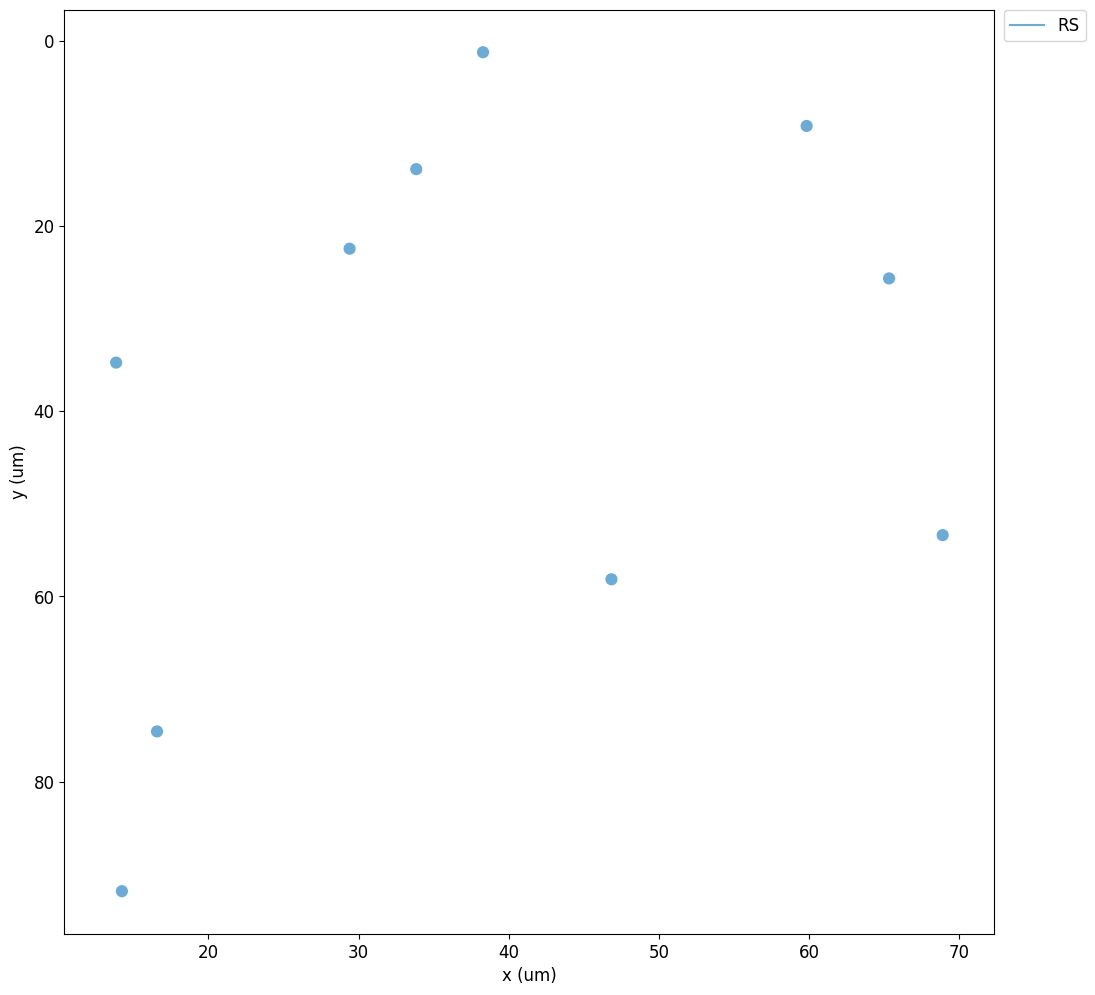

  Done; plotting time = 1.32 s


In [13]:
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc